# **Predict Cancer Mortality Rates in US Counties**

The provided dataset comprises data collected from multiple counties in the US. The regression task for this assessment is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv'). Use the notebooks provided for lab sessions throughout this module to provide solutions to the exercises listed below. Throughout all exercises text describing your code and answering any questions included in the exercise descriptions should be included as part of your submitted solution.

Note - We also provide an example test data set ('Test_data_example.csv' and 'Test_data_example_targets.csv'). This is just an example of the final test set (which will NOT be provided to you) that will be used to evaluate your solutions when your submitted solutions are being marked. The provided Test data (I.e. 'Test_data_example.csv' and 'Test_data_example_targets.csv') is NOT to be used as an independent test set when developing your models, but only to prepare your 'prediction/inference' script to make predictions on completely unseen data. Part of this assessment requires you to write such an inference script that evaluates your best, trained regression model on the final test data set such that, we are able to run the inference script ourselves on the unseen (i.e. data we have not provided to you) test data. Yyou can use the example test data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to verify that it works prior to submission.

The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county 

povertyPercent: Percent of populace in poverty 

MedianAge: Median age of county residents 

MedianAgeMale: Median age of male county residents 

MedianAgeFemale: Median age of female county residents 

AvgHouseholdSize: Mean household size of county 

PercentMarried: Percent of county residents who are married 

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

PctEmployed16_Over: Percent of county residents ages 16 and over employed 

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

PctPrivateCoverage: Percent of county residents with private health coverage 

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

PctPublicCoverage: Percent of county residents with government-provided health coverage 

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White 

PctBlack: Percent of county residents who identify as Black 

PctAsian: Percent of county residents who identify as Asian 

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

PctMarriedHouseholds: Percent of married households 

BirthRate: Number of live births relative to number of women in county 

In [51]:
import os
import pandas as pd
import numpy as np

#exercise 1
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

#exercise 2
from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion

#exercise 3
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

#exercise 5
from sklearn.ensemble import RandomForestRegressor

#exercise 6
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


#exercise 8
from sklearn.preprocessing import FunctionTransformer

#exercise 9
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [52]:
root_dir = './' # this is to be defined by you 
local_path = 'Data-for-students-regression/' # store the related data files in this folder

data_dir = root_dir + local_path
print(data_dir)
## Define paths to the training data and targets files
training_data_path = data_dir + 'Training_data.csv'
training_targets_path = data_dir + 'Training_data_targets.csv'

./Data-for-students-regression/


# **Exercise 1**

Read in the training data and targets files. The training data comprises features/predictors while the targets file comprises the targets (i.e. cancer mortality rates in US counties) you need to train models to predict. Plot histograms of all features to visualise their distributions and identify outliers. Do you notice any unusual values for any of the features? If so comment on these in the text accompanying your code. Compute correlations of all features with the target variable (across the data set) and sort them according the strength of correlations. Which are the top five features with strongest correlations to the targets? Plot these correlations using the scatter matrix plotting function available in pandas and comment on at least two sets of features that show visible correlations to each other. (5 marks)

# **Sample Answer to Exercise 1**

### 1.Read the training data and targets files

In [53]:
#load train data dataframe and check the data in it
train_data_df = pd.read_csv(training_data_path)
train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2438 non-null   float64
 1   avgDeathsPerYear         2438 non-null   int64  
 2   incidenceRate            2438 non-null   float64
 3   medIncome                2438 non-null   int64  
 4   popEst2015               2438 non-null   int64  
 5   povertyPercent           2438 non-null   float64
 6   studyPerCap              2438 non-null   float64
 7   MedianAge                2438 non-null   float64
 8   MedianAgeMale            2438 non-null   float64
 9   MedianAgeFemale          2438 non-null   float64
 10  AvgHouseholdSize         2438 non-null   float64
 11  PercentMarried           2438 non-null   float64
 12  PctNoHS18_24             2438 non-null   float64
 13  PctHS18_24               2438 non-null   float64
 14  PctSomeCol18_24         

In [54]:
#load train target dataframe and check the data in it
train_data_target_df = pd.read_csv(training_targets_path)
train_data_target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TARGET_deathRate  2438 non-null   float64
dtypes: float64(1)
memory usage: 19.2 KB


### 2.Plot histograms of all features
#### Unusual values of the features
#### Missing values
    1.Combined with the previous question and diagram below, I found that most of the data has 2438 rows, while PctSomeCol18_24 column, PctEmployed16_Over column and PctPrivateCoverageAlone column are missing data.  
    2.Among them, PctEmployed16_Over and PctPrivateCoverageAlone have smaller amount of missing data, so I think they can both be filled by averaging the data. 
#### Illogical values
    1.For avgAnncount,avgDeathsPerYear and MedianAge, their data contain some extremely large outliers, which makes most of their columns look very close to 0, while the x-axis is very large.  
#### Skewness
    1.incidenceRate, povertyPercent, PctPublicCoverageAlone and PctHS25_Over all have skewness, and they have a large impact on the results, so we need to turn them into normal distribution by some methods.

array([[<AxesSubplot:title={'center':'avgAnnCount'}>,
        <AxesSubplot:title={'center':'avgDeathsPerYear'}>,
        <AxesSubplot:title={'center':'incidenceRate'}>,
        <AxesSubplot:title={'center':'medIncome'}>,
        <AxesSubplot:title={'center':'popEst2015'}>,
        <AxesSubplot:title={'center':'povertyPercent'}>],
       [<AxesSubplot:title={'center':'studyPerCap'}>,
        <AxesSubplot:title={'center':'MedianAge'}>,
        <AxesSubplot:title={'center':'MedianAgeMale'}>,
        <AxesSubplot:title={'center':'MedianAgeFemale'}>,
        <AxesSubplot:title={'center':'AvgHouseholdSize'}>,
        <AxesSubplot:title={'center':'PercentMarried'}>],
       [<AxesSubplot:title={'center':'PctNoHS18_24'}>,
        <AxesSubplot:title={'center':'PctHS18_24'}>,
        <AxesSubplot:title={'center':'PctSomeCol18_24'}>,
        <AxesSubplot:title={'center':'PctBachDeg18_24'}>,
        <AxesSubplot:title={'center':'PctHS25_Over'}>,
        <AxesSubplot:title={'center':'PctBachDeg25_O

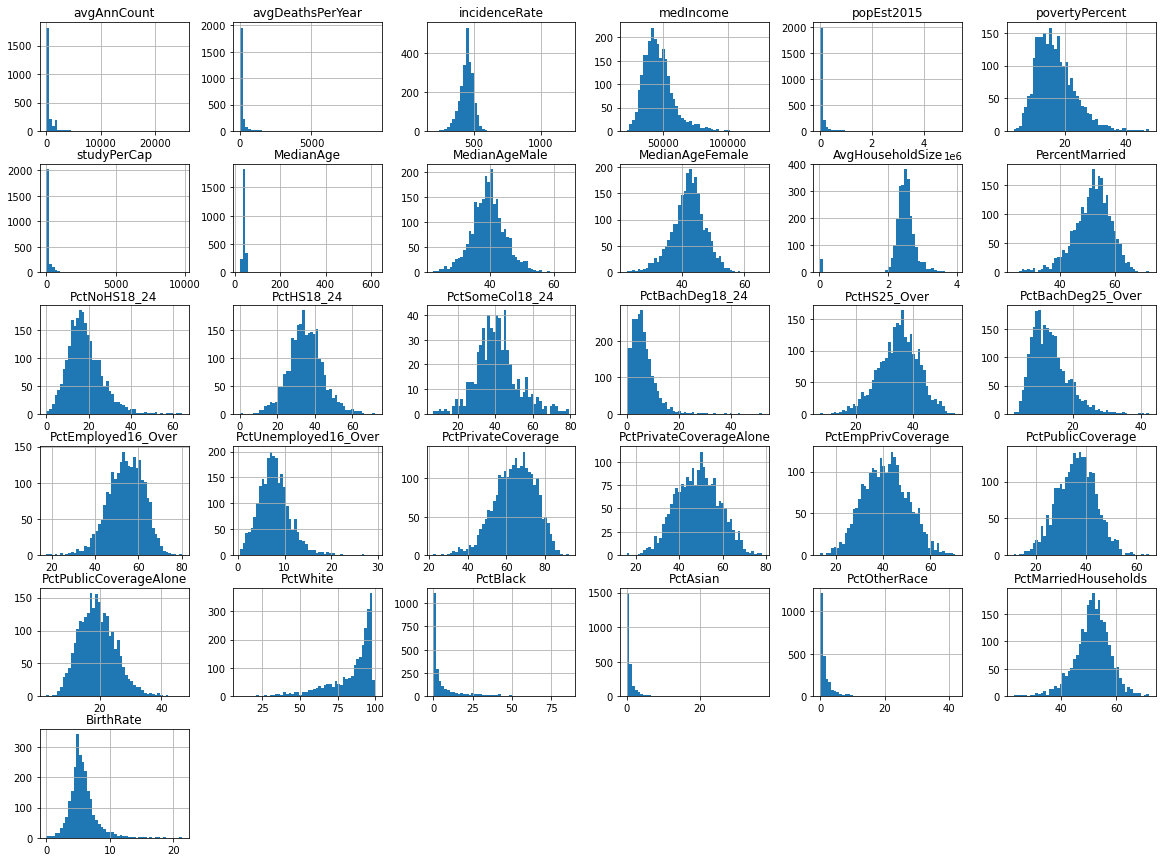

In [55]:
train_data_df.hist(bins=50,figsize=(20,15))

### 3.Compute correlations of all features with the target variable and sort them.

In [56]:
#Calculates the correlation between feature data and target data
correlations = train_data_df.corrwith(train_data_target_df['TARGET_deathRate'])
correlations_sorted = correlations.sort_values(ascending=False)
print("correlations:")
print(correlations_sorted)

correlations:
incidenceRate              0.443983
PctPublicCoverageAlone     0.439734
povertyPercent             0.413260
PctHS25_Over               0.409915
PctPublicCoverage          0.391899
PctUnemployed16_Over       0.362612
PctHS18_24                 0.266285
PctBlack                   0.236380
PctNoHS18_24               0.090565
MedianAgeFemale            0.008665
MedianAge                 -0.000039
studyPerCap               -0.024729
MedianAgeMale             -0.027263
AvgHouseholdSize          -0.045545
BirthRate                 -0.088543
avgDeathsPerYear          -0.094048
popEst2015                -0.130122
avgAnnCount               -0.150019
PctWhite                  -0.174521
PctAsian                  -0.181948
PctOtherRace              -0.182602
PctSomeCol18_24           -0.186140
PctEmpPrivCoverage        -0.259006
PercentMarried            -0.266153
PctBachDeg18_24           -0.284566
PctMarriedHouseholds      -0.290645
PctPrivateCoverageAlone   -0.355050
PctPrivateCove

 ### 4.Top five features

In [57]:
top_five_features =correlations_sorted.head(5).index
correlations_sorted.head(5)

incidenceRate             0.443983
PctPublicCoverageAlone    0.439734
povertyPercent            0.413260
PctHS25_Over              0.409915
PctPublicCoverage         0.391899
dtype: float64

### 5.Plot correlations with scatter matrix and comment on features that show visible correlations to each other. 
#### 1. IncidenceRate && PctPublicCoverage  
    These two characteristics exhibit clustering relationships. This may imply that there is specific clustering of cancer incidence at some specific levels of public insurance coverage. Specifically, there may be some specific ranges of public insurance coverage that make cancer incidence rates similar within these ranges.

#### 2. Linear relationship: PctPublicCoverageAlone && PctPublicCoverage  
    These two features exhibit a linear relationship. This indicates that the two characteristics are somehow positively correlated, i.e., an increase in the value of one characteristic is accompanied by an increase in the value of the other characteristic. This is understandable because PctPublicCoverageAlone is part of PctPublicCoverage (total public insurance coverage). Therefore, if an area has higher total public insurance coverage, then the separate public insurance coverage is likely to be higher as well.

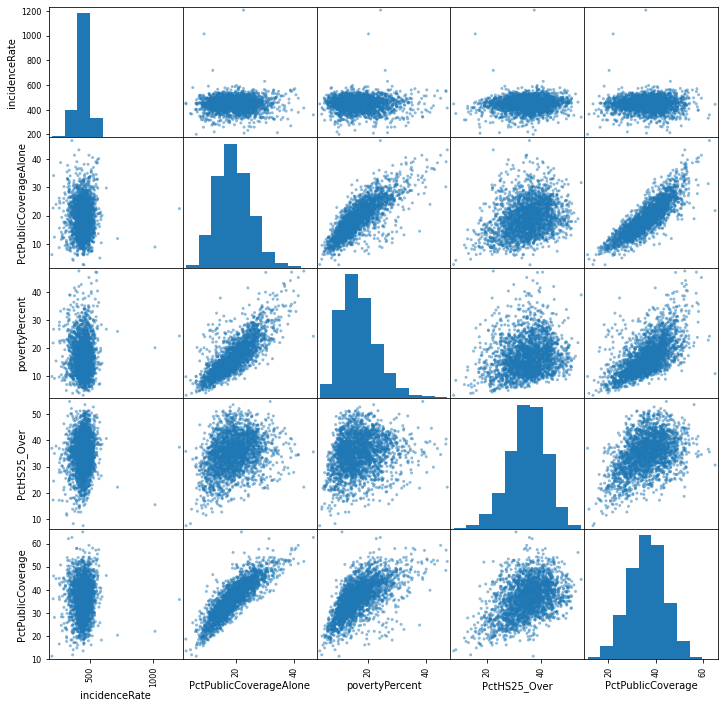

In [58]:
scatter_matrix(train_data_df[top_five_features], figsize=(12, 12), diagonal='hist')
plt.show()

# **Exercise 2**

Create an ML pipeline using scikit-learn (as demonstrated in the lab notebooks) to pre-process the training data. (3 marks)

# **Sample Answer to Exercise 2**

### 2.1 Pre-processing

In [59]:
# Define functions to clear outliers in specific columns
def clean_outliner(clean_df,col):
    Q1 = clean_df[col].quantile(0.25)
    Q3 = clean_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = clean_df[col].median()
    clean_df[col] = np.where((clean_df[col] < lower_bound) | (clean_df[col] > upper_bound), median, clean_df[col])
    
# Define functions to convert data in a specific column to a normal distribution
def normal_distribution(clean_df,col):
    clean_df[col] = np.log1p(clean_df[col])
# Define functions to delete data in a specific column 
def delete_col(clean_df,col):
    clean_df = clean_df.drop(col, axis=1,inplace=True)

#Processes data according to correlation from largest to smallest
normal_distribution(train_data_df,'povertyPercent')
normal_distribution(train_data_df,'PctHS25_Over')
normal_distribution(train_data_df,'PctBachDeg25_Over')
normal_distribution(train_data_df,'PctUnemployed16_Over')
clean_outliner(train_data_df,'PctBlack')
clean_outliner(train_data_df,'MedianAge')
clean_outliner(train_data_df,'avgAnnCount')
delete_col(train_data_df,'PctSomeCol18_24')

#Split boxes for the 'incidenceRate' column
bins= [0.0,400.0, 450.0, 500.0, 550.0,1210.0]
labels = [1.0,2.0,3.0,4.0,5.0]
countval=np.histogram(train_data_df["incidenceRate"], bins=bins)
train_data_df['incidenceRateClass'] = pd.cut(np.ceil(train_data_df['incidenceRate']), bins=bins, labels=labels)


### 2.1 Create train_set train_target test_set and test_target

In [60]:
#Split the data
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)
for train_index, test_index in split.split(train_data_df,train_data_df['incidenceRateClass']):
    cancer_train_set = train_data_df.loc[train_index]
    cancer_test_set = train_data_df.loc[test_index]
    cancer_train_target_df=train_data_target_df.loc[train_index]
    cancer_test_target_df=train_data_target_df.loc[test_index]
delete_col(cancer_train_set,'incidenceRateClass')
delete_col(cancer_test_set,'incidenceRateClass')
#cancer_train_set, cancer_test_set, cancer_train_target_df, cancer_test_target_df = train_test_split(train_data_df, train_data_target_df, test_size=0.2, random_state=42)

### 2.2 Create an ML pipeline

In [61]:
class DataFrameSelector(BaseEstimator):
    def __init__(self, attribute_names):
        self.attribute_names= attribute_names
    def fit(self,X, y = None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [62]:
# Get a list of attribute names
num_attribs = list(cancer_train_set)
# Construct a pipeline
# 1. DataFrameSelector: Selects the attributes from the DataFrame
# 2. SimpleImputer: Fills in missing values using the median strategy
# 3. StandardScaler: Scales the data
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

In [63]:
# Create train and test data
full_pipeline = FeatureUnion(transformer_list=[("num_pipeline",num_pipeline)])

cancer_data_prepared = full_pipeline.fit_transform(cancer_train_set)
cancer_data_labels = cancer_train_target_df['TARGET_deathRate']

cancer_test_data_prepared = full_pipeline.fit_transform(cancer_test_set)
cancer_test_data_labels=cancer_test_target_df['TARGET_deathRate']

# **Exercise 3**

Fit linear regression models to the pre-processed data using: Ordinary least squares (OLS), Lasso and Ridge models. Choose suitable regularisation weights for Lasso and Ridge regression and include a description in text of how they were chosen. In your submitted solution make sure you set the values for the regularisation weights equal to those you identify from your experiment(s). Quantitatively compare your results from all three models and report the best performing one. Include code for all steps above. (10 marks)


In [64]:
#Define the function to check the prediction of the model by calculating the mean square error
def check_predictions(model,data_prepared,data_labels,data_type):
    model_predictions = model.predict(data_prepared)
    scores = mean_squared_error(data_labels, model_predictions)
    scores = np.sqrt(scores)
    print(f'{data_type} scores:', scores)

In [65]:
def cross_validation(isshow,model,data_prepared,data_labels,cv):
    scores =cross_val_score(model, data_prepared,data_labels,scoring='neg_mean_squared_error',cv=cv)
    scores = np.sqrt(-scores)
    if isshow=='show':
        print('Cross_Scores:',scores)
        print('Mean:',scores.mean())
        print('Standard deviation:',scores.std())
    else:
        return scores.mean()

### 3.1 Ordinary least squares (OLS)

In [66]:
OLS_reg=LinearRegression()
OLS_reg.fit(cancer_data_prepared, cancer_data_labels)

LinearRegression()

### 3.2 Choose suitable regularisation weights for Lasso and Ridge regression

In [67]:
def find_best_weight(model_type,weight_range,data_prepared,data_labels):
    models = {'Lasso': Lasso, 'Ridge': Ridge}
    best_weight = None
    best_score = 10000
    for weight in weight_range:
        model = models[model_type](alpha=weight)
        current_scores=cross_validation('unshow',model,data_prepared,data_labels,10)
        if current_scores < best_score:
            best_weight = weight
            best_score = current_scores
    print(f'{model_type}model--best_weight',best_weight)
    return best_weight

In [68]:
weight_range=np.logspace(-4, 4, 200) 
best_weight_lasso=find_best_weight('Lasso',weight_range,cancer_data_prepared,cancer_data_labels)
best_weight_ridge=find_best_weight('Ridge',weight_range,cancer_data_prepared,cancer_data_labels)

Lassomodel--best_weight 0.06517339604882427
Ridgemodel--best_weight 15.343684089300131


### 3.3 Create Lasso and Ridge model

In [69]:
lasso_model = Lasso(alpha=best_weight_lasso)
lasso_model.fit(cancer_data_prepared, cancer_data_labels)

Lasso(alpha=0.06517339604882427)

In [20]:
ridge_model = Ridge(alpha=best_weight_ridge)
ridge_model.fit(cancer_data_prepared, cancer_data_labels)

Ridge(alpha=15.343684089300131)

### 3.4  Quantitatively compare your results from all three models and report the best performing one

In [21]:
# Compare models
models = {
    'OLS': OLS_reg,
    'Lasso': lasso_model,
    'Ridge': ridge_model
}
best_model = None
best_score = 10000

for name, model in models.items():
    print(f'Model--{name}')
    #Evaluation on the test set
    scores=cross_validation('unshow',model,cancer_test_data_prepared,cancer_test_data_labels,5)
    print("score:",scores)
    if scores< best_score:
        best_model = name
        best_score = scores
        
print(f"Best performing model: {best_model}")

Model--OLS
score: 19.763128111084587
Model--Lasso
score: 19.605938450250527
Model--Ridge
score: 19.52736178805672
Best performing model: Ridge


# **Exercise 4**

Use Lasso regression and the best regularisation weight identified from Exercise 3 to identify the five most important/relevant features for the provided data set and regression task. Report what these are desceding order of their importance. (5 marks)

In [22]:
# Get the feature_importances_ property 
feature_weights = lasso_model.coef_

# Create a dictionary mapping each attribute to its corresponding feature importance
feature_importances = dict(zip(num_attribs, feature_weights))

# Sort the dictionary 
sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

In [23]:
# Get the top 5 features with the highest importance
top_5_features = sorted_features[:5]

print("Top 5 important features:")
for feature, weight in top_5_features:
    print(f"{feature}: {weight}")

Top 5 important features:
incidenceRate: 10.120967111305147
PercentMarried: 6.217551052402486
avgDeathsPerYear: 4.10095143651519
PctHS25_Over: 3.325674660672118
PctEmpPrivCoverage: 2.8351885488003896


# **Exercise 5**

Fit a Random Forest regression model to the training data and quantitatively evaluate and compare the Random Forest regression model with the best linear regression model identified from Exercise 3. Report which model provides the best results. Next, report the top five most important/relevant features for the provided data set and regression task identified using the Random Forest model. Comment on how these compare with the features identified from Lasso regression? (12 marks)

# **Sample Answers for Exercise 5**

### 5.1 Random Forest regression model

In [24]:
forest_reg = RandomForestRegressor()
forest_reg.fit(cancer_data_prepared, cancer_data_labels)

RandomForestRegressor()

### 5.2 Evaluate and compare

Based on the cross-validation scores, the Random Forest regression model is the better model when compared to the Ridge regression model. The mean cross-validation score(neg_mean_squared_error), is lower for the Random Forest model (19.28) compared to the Ridge model (19.52). This suggests that, on average, the Random Forest model made more accurate predictions on the validation sets.

In [25]:
print('Random Forest regression model')
#Evaluation on the test set
cross_validation('show',forest_reg,cancer_data_prepared,cancer_data_labels,5)
print(f"Best performing model: {best_model}")
cross_validation('show',models[best_model],cancer_test_data_prepared,cancer_test_data_labels,5)

Random Forest regression model
Cross_Scores: [20.53971123 17.93891782 19.80080158 18.79661675 18.71283913]
Mean: 19.15777730311703
Standard deviation: 0.9096424527617359
Best performing model: Ridge
Cross_Scores: [21.34575048 18.22921506 16.5206241  21.74591887 19.79530043]
Mean: 19.52736178805672
Standard deviation: 1.9506911875089057


### 5.3  The top five most important/relevant features

In [26]:
# Get the feature_importances_ property 
forest_feature_weights = forest_reg.feature_importances_

# Create a dictionary mapping each attribute to its corresponding feature importance
forest_feature_importances = dict(zip(num_attribs, forest_feature_weights))

# Sort the dictionary 
forest_sorted_features = sorted(forest_feature_importances.items(), key=lambda x: x[1], reverse=True)

# Get the top 5 features with the highest importance
forest_top_5_features = forest_sorted_features[:5]

print("Top 5 important features:")
for feature, weight in forest_top_5_features:
    print(f"{feature}: {weight}")

Top 5 important features:
incidenceRate: 0.20672073287415216
PctBachDeg25_Over: 0.2031282600437991
medIncome: 0.06795152040776768
PctHS25_Over: 0.040094776236743505
avgDeathsPerYear: 0.034073668608845184


### 5.4  Compare with the features of Lasso

The feature importance lists for the Random Forest regression model and the Lasso regression model reveal interesting insights into what each model is prioritizing when making predictions.  
In the Random Forest regression model, the top two features are 'PctBachDeg25_Over' and 'incidenceRate', with importance values of 0.21 and 0.20 respectively. This suggests that the model is heavily relying on the education background and Mean per capita (100,000) cancer diagoses.  
In contrast, the Lasso regression model has 'incidenceRate' as the most important feature, with an importance value of 10.12, followed by 'PercentMarried' and 'avgDeathsPerYear'.  
Notably, 'incidenceRate' and 'avgDeathsPerYear' are identified as important features by both models, indicating that these are likely key predictive features in the dataset.  
The difference in feature importance between the two models could be due to their different methodologies. Random Forests consider interactions between features, whereas Lasso regression tends to select one feature from a group of correlated features, which could explain why the features emphasized by each model differ.  

# **Exercise 6**

Use the provided test example data ('Test_data_example.csv' and 'Test_data_example_targets.csv') to write an inference script to evaluate the best regression model identified from preceding exercises. First re-train the chosen regression model using all of the provided training data and test your predictions on the provided example test data. Note - the final evaluation of your submission will be done by replacing this example test data with held out (unseen) test data that is not provided to you. Use the code snippet provided below to prepare your inference script to predict targets for the unseen test data. (3 marks)

In [27]:
## Read in the provided example test data
test_data_path = data_dir + 'Test_data_example.csv'
test_targets_path = data_dir + 'Test_data_example_targets.csv'

test_data = pd.read_csv(test_data_path)
test_targets = pd.read_csv(test_targets_path)

# **Sample Answers for Exercise 6**

*   Retrain the best regression model identified with best set of associated hyperparameters on the provided training set (1 mark)
*   Write inference script to accept unseen test data as input similar to the provided example test data, predict targets, and evaluate predictions quantitatively using suitable metrics (2 marks)



In [49]:
## Retrain your chosen regression model here 
# For example: lin_reg = LinearRegression()
# lin_reg.fit(X_train,y_train) where X_train and y_train is provided training data
# Next write the lines of code required to predict on unseen test data and evaluate your predictions
X_train, y_train=cancer_data_prepared, cancer_data_labels
X_test,y_test = full_pipeline.fit_transform(test_data),test_targets['TARGET_deathRate']
param_grid = {
    'n_estimators': [50,150],  
    'max_features':[10,20],
    'max_depth': [10,20],  
    'min_samples_split': [5,10],  
    'min_samples_leaf': [2,4],  
}

forest_reg=RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=10,scoring='neg_mean_squared_error')
grid_search.fit(cancer_data_prepared, cancer_data_labels)
grid_search.best_params_

{'max_depth': 20,
 'max_features': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 150}

In [50]:
#Evaluation on the test set
check_predictions(grid_search,X_test,y_test,'RF')
cross_validation('show',grid_search,X_test,y_test,10)

RF scores: 20.722138116532506
Cross_Scores: [20.77255945 22.36354537 26.8561443  30.64317739 34.42805791 22.05673192
 20.29283243  7.32672193 13.84488457 33.47224292]
Mean: 23.205689818835094
Standard deviation: 8.100531875573724


# **Classification of 1-year patient mortality following a heart attack**

The provided data set contains data from patients who all suffered heart attacks at some point in the past. Some are still alive and some are not. The data provided contains key clinical information (features) for each patient and the prediction task involves identifying (classifying) which patients are likely to survive for at least one year following the heart attack.
The provided features (clinical variables) to be used as predictors by your classification models include the following:

    1. age-at-heart-attack -- age in years when heart attack occurred
    2. pericardial-effusion -- binary. Pericardial effusion is fluid
			      around the heart.  0=no fluid, 1=fluid
    3. fractional-shortening -- a measure of contracility around the heart
			       lower numbers are increasingly abnormal
    4. epss -- E-point septal separation, another measure of contractility.  
	      Larger numbers are increasingly abnormal.
    5. lvdd -- left ventricular end-diastolic dimension.  This is
	      a measure of the size of the heart at end-diastole.
	      Large hearts tend to be sick hearts.

    6. wall-motion-index -- equals wall-motion-score divided by number of
			   segments seen.  Usually 12-13 segments are seen
			   in an echocardiogram.  
               
The target variable is encoded as a binary outcome of whether a patient survived for 1 year post-heart attack or not. Label '0' indicates that the patient died within one year of a heart attack. Label '1' indicates that the patient survived for at least one year after a heart attack.

# **Exercise 7**

Read in the provided data set for classification of patients at risk of mortality 1-yr post heart attack. Plot histograms of all features to visualise their distributions and identify outliers. Report identified outliters and take steps to deal with outliers (if any) appropriately (3 marks)

In [30]:
root_dir = './' # this is to be defined by you 
local_path = 'Data-for-students-classification/' # store the related data files in this folder
data_dir = root_dir + local_path

data_features_path = data_dir + 'Heart-attack-data-predictors.csv'
data_targets_path = data_dir + 'Heart-attack-data-targets.csv'

### 7.1 Load data

In [31]:
heart_train_data_df = pd.read_csv(data_features_path)
heart_train_data_target_df = pd.read_csv(data_targets_path)
print(heart_train_data_df.info())
print(heart_train_data_target_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AgeAtHeartAttack      126 non-null    float64
 1   PericardialEffusion   131 non-null    int64  
 2   FractionalShortening  124 non-null    float64
 3   epss                  117 non-null    float64
 4   lvdd                  121 non-null    float64
 5   WallMotionIndex       130 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 6.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Target-class  131 non-null    int64
dtypes: int64(1)
memory usage: 1.1 KB
None


### 7.2 Plot histograms of all features

#### Outliers
The data of WallMotionIndex has some problems, on the one hand there are outliers, and on the other hand it does not show a normal distribution

array([[<AxesSubplot:title={'center':'AgeAtHeartAttack'}>,
        <AxesSubplot:title={'center':'PericardialEffusion'}>],
       [<AxesSubplot:title={'center':'FractionalShortening'}>,
        <AxesSubplot:title={'center':'epss'}>],
       [<AxesSubplot:title={'center':'lvdd'}>,
        <AxesSubplot:title={'center':'WallMotionIndex'}>]], dtype=object)

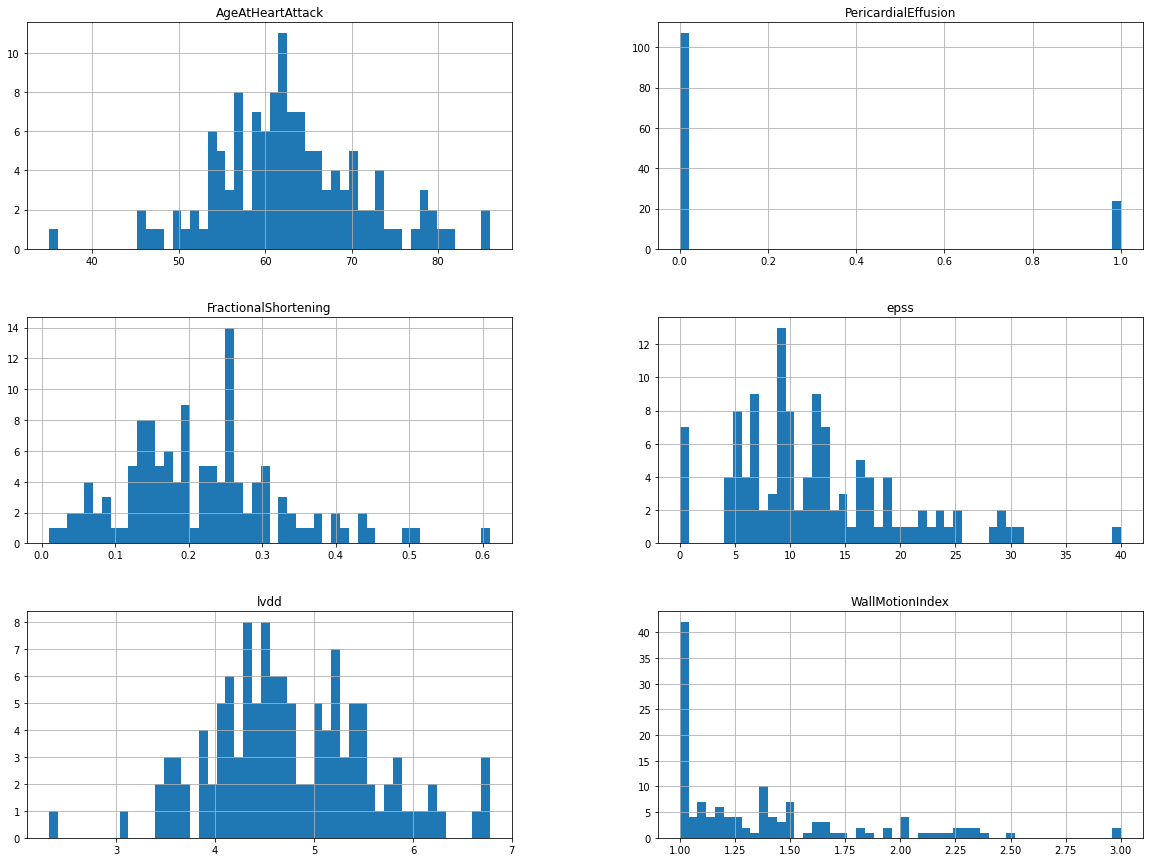

In [32]:
heart_train_data_df.hist(bins=50,figsize=(20,15))

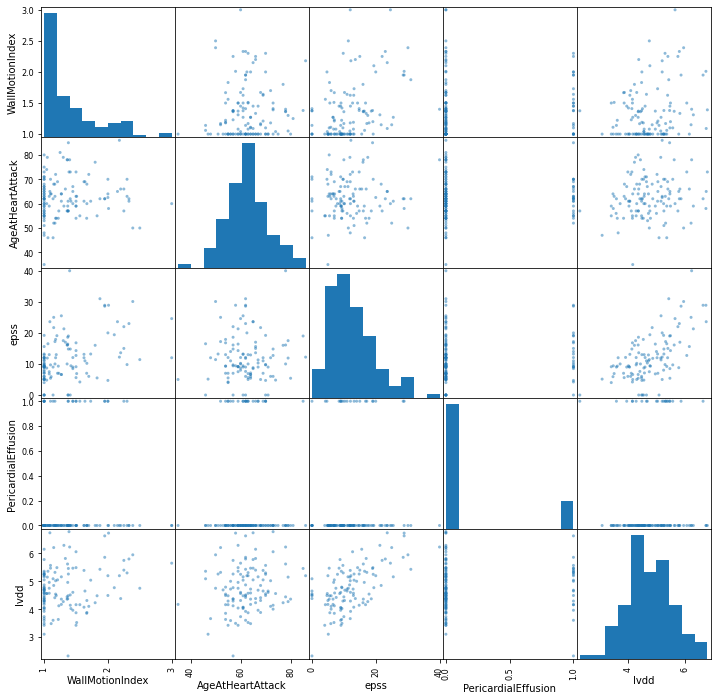

In [33]:
correlations = heart_train_data_df.corrwith(heart_train_data_target_df['Target-class'])
correlations_sorted = correlations.sort_values(ascending=False)
top_five_features =correlations_sorted.head(5).index
scatter_matrix(heart_train_data_df[top_five_features], figsize=(12, 12), diagonal='hist')
plt.show()

# **Exercise 8**

Create a machine learning pipeline using scikit-learn and pre-process the provided data appropriately (3 marks)

In [34]:
#pre process
normal_distribution(heart_train_data_df,'WallMotionIndex')
clean_outliner(heart_train_data_df,'WallMotionIndex')

#split data
heart_train_set, heart_test_set, heart_train_target_df, heart_test_target_df = train_test_split(heart_train_data_df, heart_train_data_target_df, test_size=0.2, random_state=42)

# List the attributes
heart_num_attribs=['AgeAtHeartAttack','PericardialEffusion','FractionalShortening','epss','lvdd','WallMotionIndex']
PE_num_attribs=['PericardialEffusion']

# Define a processing pipeline that includes selecting specific attributes from the DataFrame, 
#filling in the missing values with the median, and then normalizing
heart_num_pipeline= Pipeline([
    ('selector', DataFrameSelector(heart_num_attribs)),
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

#PericardialEffusion has only two values of 0,1, 
#which means it can't do StandardScaler() and needs to be taken out separately.
PE_num_pipeline= Pipeline([
    ('selector', DataFrameSelector(PE_num_attribs)),
    ('imputer',SimpleImputer(strategy="median")),
    ('arrayts', FunctionTransformer(np.array)),
])

# Pre-processing of training and test data using the defined full pipeline
full_pipeline = FeatureUnion(transformer_list=[("heart_num_pipeline",heart_num_pipeline),("PE_num_pipeline",PE_num_pipeline)])
heart_data_prepared = full_pipeline.fit_transform(heart_train_set)
heart_data_labels=heart_train_target_df['Target-class']
heart_test_data_prepared = full_pipeline.fit_transform(heart_test_set)
heart_test_data_labels=heart_test_target_df['Target-class']

# **Exercise 9**

Train logistic regression classifiers, with and without L1 and L2 regularisation, using the provided data and compare and evaluate their performance. Report the best performing classifier, with supporting evidence/justification for why it was identified as the best performing classifier. (14 marks)

使用所提供的数据训练逻辑回归分类器，有无L1和L2正则化，并比较和评估其性能。报告表现最好的分类器，并对其被确定为表现最好的分类器的原因提供支持性证据/理由。

In [35]:
def classifiers_cross_validation(isshow,model,data_prepared,data_labels,cv,scoring):
    scores =cross_val_score(model, data_prepared,data_labels,scoring=scoring,cv=cv)
    if isshow=='show':
        print('Cross_Scores:',scores)
        print('Mean:',scores.mean())
        print('Standard deviation:',scores.std())
    else:
        return scores.mean()

### 9.1 Logistic regression classifiers without L1 and L2 regularisation

In [36]:
lr_no_reg = LogisticRegression(penalty='none', random_state=42)
lr_no_reg.fit(heart_data_prepared, heart_data_labels)

LogisticRegression(penalty='none', random_state=42)

In [37]:
#Accuracy
print('Accuracy')
classifiers_cross_validation('show',lr_no_reg,heart_test_data_prepared,heart_test_data_labels,5,'accuracy')
#ROC-AUC
print('ROC')
classifiers_cross_validation('show',lr_no_reg,heart_test_data_prepared,heart_test_data_labels,5,'roc_auc')

Accuracy
Cross_Scores: [0.5        0.83333333 0.8        0.2        0.8       ]
Mean: 0.6266666666666667
Standard deviation: 0.24531159323965468
ROC
Cross_Scores: [0.125 1.    1.    0.    1.   ]
Mean: 0.625
Standard deviation: 0.4609772228646444


### 9.2 Logistic regression classifiers with L1

In [38]:
# L1
lr_modle_l1 = LogisticRegression(random_state=42,penalty="l1",solver="liblinear")
lr_modle_l1.fit(heart_data_prepared,heart_data_labels)

LogisticRegression(penalty='l1', random_state=42, solver='liblinear')

In [39]:
#Accuracy
print('Accuracy')
classifiers_cross_validation('show',lr_modle_l1,heart_test_data_prepared,heart_test_data_labels,5,'accuracy')
#ROC-AUC
print('ROC')
classifiers_cross_validation('show',lr_modle_l1,heart_test_data_prepared,heart_test_data_labels,5,'roc_auc')

Accuracy
Cross_Scores: [0.66666667 0.83333333 0.8        0.4        1.        ]
Mean: 0.74
Standard deviation: 0.20044395171163878
ROC
Cross_Scores: [0.5  1.   1.   0.25 1.  ]
Mean: 0.75
Standard deviation: 0.31622776601683794


### 9.3 Logistic regression classifiers with L2

In [40]:
# L2
lr_model_l2 = LogisticRegression(penalty='l2', solver='saga', random_state=42)
lr_model_l2.fit(heart_data_prepared, heart_data_labels)

LogisticRegression(random_state=42, solver='saga')

In [41]:
#Accuracy
print('Accuracy')
classifiers_cross_validation('show',lr_model_l2,heart_test_data_prepared,heart_test_data_labels,5,'accuracy')
#ROC-AUC
print('ROC')
classifiers_cross_validation('show',lr_model_l2,heart_test_data_prepared,heart_test_data_labels,5,'roc_auc')

Accuracy
Cross_Scores: [0.66666667 0.83333333 1.         0.6        1.        ]
Mean: 0.82
Standard deviation: 0.16546231527987812
ROC
Cross_Scores: [0.5  1.   1.   0.25 1.  ]
Mean: 0.75
Standard deviation: 0.31622776601683794


### 9.4 Evaluation

From the data above, the best performing classifier is the Logistic regression classifier with L2 regularisation.

When we compare the mean accuracy across the three models, we can see that the L2 regularised Logistic Regression classifier has the highest mean accuracy of 0.82, which is higher than the L1 regularised model (mean accuracy of 0.74) and the model without any regularisation (mean accuracy of 0.626).

The standard deviation of the accuracy scores is also lowest for the L2 regularised Logistic Regression model (0.165). This indicates that the performance of this model is more consistent across different subsets of data compared to the other models.

In terms of ROC scores, both the L1 and L2 regularised models have the same mean score of 0.75. This is higher than the model without regularisation (mean ROC score of 0.625). However, the standard deviation of the ROC scores is the same for both L1 and L2 regularised models, indicating similar performance in distinguishing classes.

Given these observations, the Logistic regression classifier with L2 regularisation performs best in terms of both accuracy and consistency, making it the best performing classifier among the three.

# **Exercise 10**

Train a Random Forest classifier using the provided data and quantitatively evaluate and compare the Random Forest classifier  with the best logistic regression classifier identified from Exercise 9. Report which model provides the best results. Next, report the top five most important/relevant features identified using the Random Forest model. (10 marks)

### 10.1 Random Forest classifier

In [42]:
# Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(heart_data_prepared, heart_data_labels)

RandomForestClassifier(random_state=42)

### 10.2 Evaluate and compare

Based on the given results, the Logistic Regression classifier with L2 regularization performs better than the Random Forest classifier. Here's why:

Accuracy: The mean accuracy of the Logistic Regression classifier with L2 regularization is 0.82, which is higher than the mean accuracy of the Random Forest classifier, which is 0.7467. This means that, on average, the Logistic Regression classifier is more likely to correctly classify an instance.

Standard deviation of Accuracy: The standard deviation of accuracy for the Logistic Regression classifier with L2 regularization is 0.31, which is higher than that of the Random Forest classifier (0.0653). This means that the accuracy of the Logistic Regression classifier can vary more from one round of cross-validation to another. However, even considering this variability, its lowest possible accuracy (mean - standard deviation) is still higher than the mean accuracy of the Random Forest classifier.

ROC: The mean ROC score for the Logistic Regression classifier with L2 regularization is 0.75, which is higher than the mean ROC score for the Random Forest classifier, which is 0.6. The ROC score measures the trade-off between the true positive rate and the false positive rate, so a higher ROC score indicates a better model.

Therefore, the Logistic Regression classifier with L2 regularization is the best performing model among these two based on both accuracy and ROC scores.

In [43]:
print('Random Forest classifier')
#Accuracy
print('Accuracy')
classifiers_cross_validation('show',rf_model,heart_test_data_prepared,heart_test_data_labels,5,'accuracy')
#ROC-AUC
print('ROC')
classifiers_cross_validation('show',rf_model,heart_test_data_prepared,heart_test_data_labels,5,'roc_auc')

print('Logistic regression classifiers with L2')
#Accuracy
print('Accuracy')
classifiers_cross_validation('show',lr_model_l2,heart_test_data_prepared,heart_test_data_labels,5,'accuracy')
#ROC-AUC
print('ROC')
classifiers_cross_validation('show',lr_model_l2,heart_test_data_prepared,heart_test_data_labels,5,'roc_auc')


Random Forest classifier
Accuracy
Cross_Scores: [0.66666667 0.66666667 0.8        0.8        0.8       ]
Mean: 0.7466666666666667
Standard deviation: 0.06531972647421812
ROC
Cross_Scores: [0.5 1.  0.5 0.  1. ]
Mean: 0.6
Standard deviation: 0.37416573867739417
Logistic regression classifiers with L2
Accuracy
Cross_Scores: [0.66666667 0.83333333 1.         0.6        1.        ]
Mean: 0.82
Standard deviation: 0.16546231527987812
ROC
Cross_Scores: [0.5  1.   1.   0.25 1.  ]
Mean: 0.75
Standard deviation: 0.31622776601683794


In [44]:
# List containing all the attributes used in the model
all_attribs=heart_num_attribs+PE_num_attribs

# Get the feature_importances_ property 
random_forest_feature_weights = rf_model.feature_importances_

# Create a dictionary mapping each attribute to its corresponding feature importance
random_forest_feature_importances = dict(zip(all_attribs, random_forest_feature_weights))

# Sort the dictionary 
random_forest_sorted_features = sorted(random_forest_feature_importances.items(), key=lambda x: x[1], reverse=True)

# Get the top 5 features with the highest importance
random_forest_top_5_features = random_forest_sorted_features[:5]

print("Top 5 features:")
for feature, weight in random_forest_top_5_features:
    print(f"{feature}: {weight}")


Top 5 features:
epss: 0.21903443495030095
lvdd: 0.20669338696099115
WallMotionIndex: 0.2026654921473333
FractionalShortening: 0.16330043713161457
AgeAtHeartAttack: 0.15563413564646245
